In [1]:
%reset -f
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from matplotlib import gridspec
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.ticker import NullFormatter
from IPython.display import set_matplotlib_formats
#User-defined package
import general as g

%matplotlib inline
#有了%matplotlib inline 就可以省掉plt.show()了
set_matplotlib_formats('svg')
#svg: Scalable Vector Graphics

/var/folders/p4/k2mn1bys7kj2_sc0401cf08h0000gn/T/ipykernel_32372/78877899.py:16: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


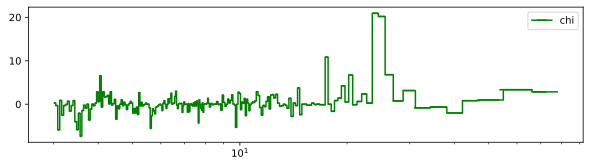

In [5]:
def pl_chi(infile,mycolor='red',legend='chi'):
        g.rewrite_ipl(infile)
        fig = plt.figure(figsize=(10,2.5))

        datafile = f"temp-0.txt"
        data = np.genfromtxt(datafile, unpack=True)

        ax = plt.subplot(1,1,1)
        ax.set_xscale('log')
        ax.errorbar(x=data[0],y=data[2],xerr=data[1],marker='o',ms=0.0,color=mycolor,ds='steps-mid',label=legend)
        ax.legend()
        
        #delete temp files
        temp_file = g.rewrite_ipl(infile)
        for n in range(temp_file):
                os.remove(f"temp-{n}.txt")
                if os.path.exists(f"temp-{n}.txt-e") is True:
                        os.remove(f"temp-{n}.txt-e")
        return fig, ax

infile='relionCp-nk_half-br_pl-chi.txt'
fig,ax = pl_chi(infile,'green')

In [3]:
def do_pl_chi(infile,ax,mycolor='red',legend='chi'):
        g.rewrite_ipl(infile)

        datafile = f"temp-0.txt"
        data = np.genfromtxt(datafile, unpack=True)

        ax.set_xscale('log')
        ax.errorbar(x=data[0],y=data[2],xerr=data[1],marker='o',ms=0.0,color=mycolor,ds='steps-mid',label=legend)
        ax.legend()
        
        
        #delete temp files
        temp_file = g.rewrite_ipl(infile)
        for n in range(temp_file):
                os.remove(f"temp-{n}.txt")
                if os.path.exists(f"temp-{n}.txt-e") is True:
                        os.remove(f"temp-{n}.txt-e")

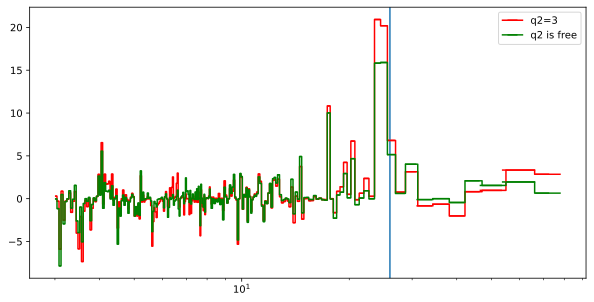

In [4]:
def pl_chi_2files(infiles:list):
        colors=['red','green']
        fig = plt.figure(figsize=(10,5))
        ax = plt.subplot(1,1,1)
        
        do_pl_chi(infiles[0],ax,mycolor=colors[0],legend='q2=3')
        do_pl_chi(infiles[1],ax,mycolor=colors[1],legend='q2 is free')
        return fig, ax

fig,ax = pl_chi_2files(['relionCp-nk_half-br_pl-chi.txt','relionCp-nk_pl-chi.txt'])
ax.axvline(x=26.0)